# Imports

In [14]:
from transformers import BertTokenizer, BertModel
import torch

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import os


# Tratamento de dados

In [17]:
data_dir = "./corpus"

with open(os.path.join(data_dir, "macmorpho-test.txt"), "r", encoding="utf-8") as f:
    train_data = f.readlines()

sentences = []
tags = []

for line in train_data:
    # Separar tokens e tags usando espaço como delimitador
    tokens, tags_line = [], []
    for word_tag in line.strip().split():
        # Dividir o token e a tag pelo delimitador '_'
        if "_" in word_tag:
            token, tag = word_tag.rsplit("_", 1)  # Dividir a última ocorrência de '_'
            tokens.append(token)
            tags_line.append(tag)
        else:
            # Caso raro onde não há um delimitador '_'
            print(f"Token sem tag: {word_tag}")
    
    # Adicionar a sentença como uma única string e as tags correspondentes
    sentences.append(" ".join(tokens))  # Juntar tokens em uma única string
    tags.append(tags_line)

# Exibir as primeiras sentenças e tags
for i in range(3):
    print(f"Sentence {i+1}: {sentences[i]}")
    print(f"Tags {i+1}: {tags[i]}")
    print()

#printar tokens
print(tokens)

Sentence 1: Salto sete
Tags 1: ['N', 'ADJ']

Sentence 2: O grande assunto da semana em Nova York é a edição da revista " New Yorker " que está nas bancas .
Tags 2: ['ART', 'ADJ', 'N', 'PREP+ART', 'N', 'PREP', 'NPROP', 'NPROP', 'V', 'ART', 'N', 'PREP+ART', 'N', 'PU', 'NPROP', 'NPROP', 'PU', 'PRO-KS', 'V', 'PREP+ART', 'N', 'PU']

Sentence 3: Número duplo especial , é inteirinho dedicado a ensaios sobre moda .
Tags 3: ['N', 'ADJ', 'ADJ', 'PU', 'V', 'ADJ', 'PCP', 'PREP', 'N', 'PREP', 'N', 'PU']

['O', 'premiê', 'da', 'Itália', ',', 'Silvio', 'Berlusconi', ',', 'negou', 'ontem', 'que', 'tenha', 'pedido', 'ao', 'presidente', 'do', 'país', ',', 'Oscar', 'Luigi', 'Scalfaro', ',', 'a', 'antecipação', 'de', 'eleições', '.']


# Analise inicial

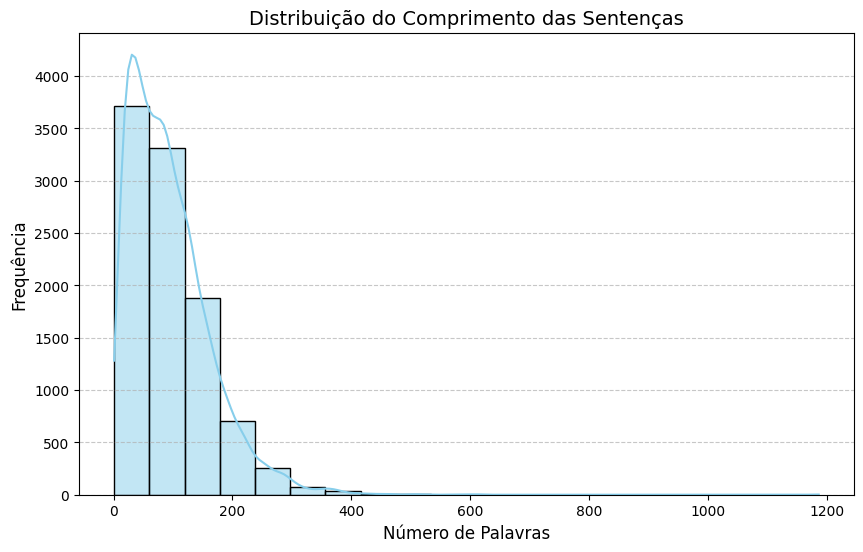

C:\Users\thais\AppData\Local\Temp\ipykernel_9008\718174372.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tags), y=list(counts), palette="viridis")


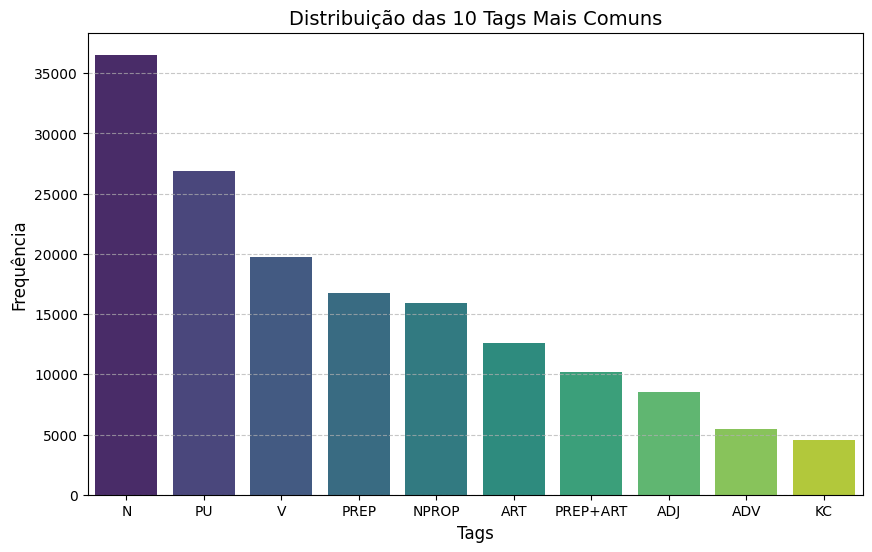

C:\Users\thais\AppData\Local\Temp\ipykernel_9008\718174372.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(all_tags), y=list(all_counts), palette="coolwarm")


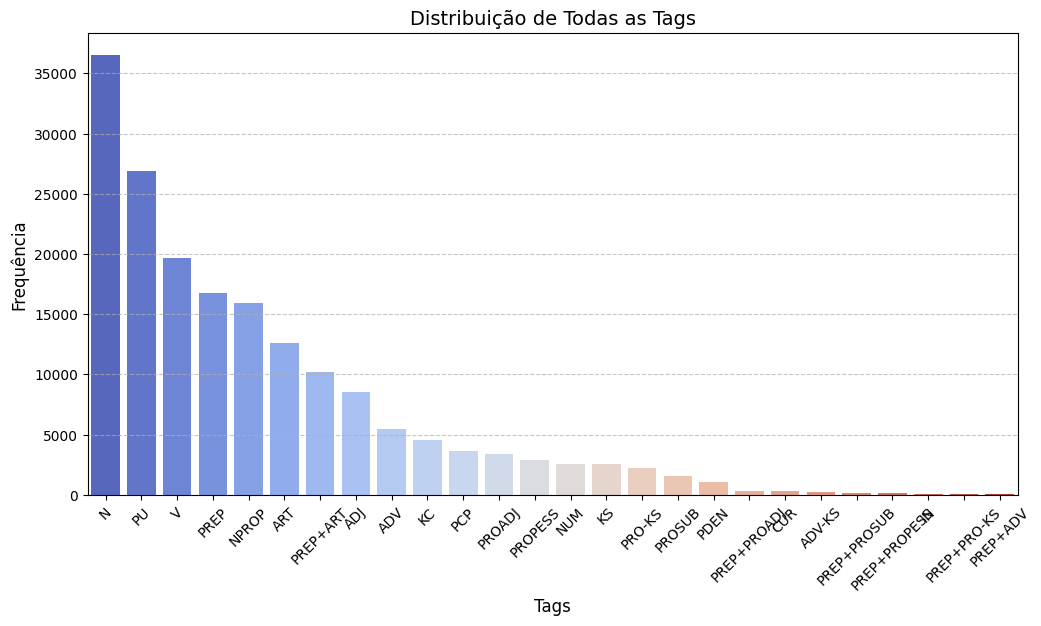

In [16]:
# Contar o número total de sentenças e comprimento de cada sentença
sentence_lengths = [len(sentence) for sentence in sentences]

# Contar a frequência de cada tag
tag_counts = Counter(tag for tag_list in tags for tag in tag_list)

# Top 10 tags mais comuns
top_tags = tag_counts.most_common(10)

# --- Gráfico 1: Distribuição do comprimento das sentenças ---
plt.figure(figsize=(10, 6))
sns.histplot(sentence_lengths, bins=20, kde=True, color="skyblue")
plt.title("Distribuição do Comprimento das Sentenças", fontsize=14)
plt.xlabel("Número de Palavras", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# --- Gráfico 2: Distribuição das 10 tags mais comuns ---
tags, counts = zip(*top_tags)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(tags), y=list(counts), palette="viridis")
plt.title("Distribuição das 10 Tags Mais Comuns", fontsize=14)
plt.xlabel("Tags", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# --- Gráfico 3: Distribuição de todas as tags (se houver muitas tags, exibe só 20) ---
all_tags, all_counts = zip(*tag_counts.most_common(30))
plt.figure(figsize=(12, 6))
sns.barplot(x=list(all_tags), y=list(all_counts), palette="coolwarm")
plt.title("Distribuição de Todas as Tags", fontsize=14)
plt.xlabel("Tags", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Tokenização com BERT